In [15]:
import pandas as pd
import numpy as np
import json
data = pd.read_csv('products.csv')



.head() just shows the first 5 cells of the dataframe

TCIN means "Target.com Item Number"

SKU means "Stock Keeping Unit"

NOON I think is just null/NaN/None

In [16]:
data.head()

,category,date-collected,product,product-details,query,store
0,vegetables,2021-08-24,vegetables,"{""tcin"":{""S"":""47095644""},""pricing"":{""M"":{""curr...",vegetables,target
1,vegetables,2021-08-24,vegetables,"{""images"":{""M"":{""image_keys"":{""L"":[{""S"":""v1628...",vegetables,noon
2,fish_seafood,2021-08-23,seafood,"{""images"":{""M"":{""image_keys"":{""L"":[{""S"":""v1558...",seafood,noon
3,oils_fats,2021-08-24,butter,"{""tcin"":{""S"":""53930343""},""pricing"":{""M"":{""curr...",butter,target
4,small_electric_household_appliances,2021-08-25,rice cooker,"{""sku"":{""S"":""131735446""},""pricing"":{""M"":{""disp...",rice cooker,walmart


See that each dictionary that describes a product is totally unreadable

In [17]:
data["product-details"]
data["product-details"][0]


'{"tcin":{"S":"47095644"},"pricing":{"M":{"current_retail":{"N":"0.69"},"formatted_current_price":{"S":"$0.69"},"formatted_current_price_type":{"S":"reg"}}},"info":{"M":{"product_vendors":{"L":[{"M":{"vendor_name":{"S":"D.L.J. Produce Inc."},"id":{"S":"1990011"}}},{"M":{"vendor_name":{"S":"Armstrong Produce, LTD"},"id":{"S":"1980532"}}},{"M":{"vendor_name":{"S":"Nature Fresh Farms Inc."},"id":{"S":"1977164"}}},{"M":{"vendor_name":{"S":"West Pak Avocado Inc."},"id":{"S":"1973872"}}},{"M":{"vendor_name":{"S":"Index Fresh"},"id":{"S":"1973861"}}},{"M":{"vendor_name":{"S":"KULA PRODUCE"},"id":{"S":"1334034"}}},{"M":{"vendor_name":{"S":"CASTELLINI COMPANY LLC"},"id":{"S":"1313589"}}},{"M":{"vendor_name":{"S":"CALAVO GROWERS INC"},"id":{"S":"1295128"}}},{"M":{"vendor_name":{"S":"MISSION PRODUCE INC"},"id":{"S":"1289574"}}},{"M":{"vendor_name":{"S":"CHARLIE\'S PRODUCE"},"id":{"S":"1282296"}}},{"M":{"vendor_name":{"S":"C.H. ROBINSON - DSD"},"id":{"S":"1264366"}}},{"M":{"vendor_name":{"S":"WHOL

"product-details" is the real meat of the data set. This FOR LOOP loops through product-details column, which contains a bunch of nested dictionaries that are in string form. "True" with a capital T and "False" with a capital F is the correct Python syntax, so it makes this correction. 

The variable productdetails_arr is a list of indices 0 to 3245, which at each index contains a dictionary describing each product. 

In [18]:
testseries = data["product-details"]
productdetails_arr = []
for item in testseries:
    item = item.replace("true", "True")
    item = item.replace("false", "False")
    productdetails_arr.append(eval(item))

The json.dumps is purely a visualization tool, that automatically displays a very readable formatted complex and hard to read dictionary.

This is an example of it used to visualize data about the first (0th) product.

In [37]:
print(json.dumps(productdetails_arr[1], indent=4))

{
    "images": {
        "M": {
            "image_keys": {
                "L": [
                    {
                        "S": "v1628406832/N29469747A_1"
                    }
                ]
            }
        }
    },
    "name": {
        "S": "Char Grilled Peppers 290g"
    },
    "sku": {
        "S": "N29469747A"
    },
    "brand": {
        "S": "Sacla"
    },
    "specifications": {
        "L": [
            {
                "M": {
                    "name": {
                        "S": "Packaging Disclaimer"
                    },
                    "value": {
                        "S": "Packaging may vary"
                    },
                    "code": {
                        "S": "attribute_key_3"
                    }
                }
            },
            {
                "M": {
                    "name": {
                        "S": "Size"
                    },
                    "value": {
                        "S": "290 g"
     

Making a list of the different categories and products.

In [20]:
category_list = list(set(data["category"]))

In [21]:
print(category_list)

['vegetables', 'milk_cheese_eggs', 'fish_seafood', 'small_electric_household_appliances', 'beef', 'meat', 'oils_fats', 'bread_cereal']


In [22]:
category_dict = {}
for category in category_list:
    category_dict[category] = []

In [23]:
product_list = list(set(data["product"]))

In [24]:
product_list

['vegetables',
 'eggs',
 'veal',
 'beef',
 'mixer',
 'bakery',
 'fish',
 'food processor',
 'seafood',
 'pasta',
 'potatoes',
 'bread',
 'toaster',
 'rice',
 'butter',
 'margarine',
 'frozen-fish',
 'frozen-seafood',
 'microwave',
 'cereal',
 'rice cooker',
 'goat',
 'poultry',
 'curd',
 'cheese',
 'coffee maker',
 'fryer',
 'electric grill',
 'oil',
 'chicken',
 'couscous',
 'milk',
 'lamb',
 'tuber-vegetables']

In [25]:
store_list = list(set(data["store"]))
store_list

['target', 'walmart', 'ubuy', 'noon']

In [26]:
categoryProductRelations = {}
for category in category_list:
    products = []
    for rowProduct, rowCategory in zip(data["product"], data["category"]):
        if rowCategory == category:
            products.append(rowProduct)
    categoryProductRelations[category] = set(products)
categoryProductRelations

{'vegetables': {'potatoes', 'tuber-vegetables', 'vegetables'},
 'milk_cheese_eggs': {'cheese', 'curd', 'eggs', 'milk'},
 'fish_seafood': {'fish', 'frozen-fish', 'frozen-seafood', 'seafood'},
 'small_electric_household_appliances': {'coffee maker',
  'electric grill',
  'food processor',
  'fryer',
  'microwave',
  'mixer',
  'rice cooker',
  'toaster'},
 'beef': {'beef'},
 'meat': {'beef', 'chicken', 'goat', 'lamb', 'poultry', 'veal'},
 'oils_fats': {'butter', 'margarine', 'oil'},
 'bread_cereal': {'bakery', 'bread', 'cereal', 'couscous', 'pasta', 'rice'}}

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sci

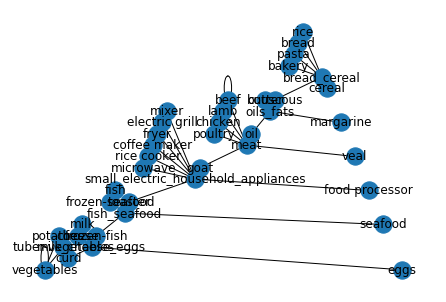

In [28]:

nodeNames = category_list + product_list
G = nx.Graph()
G.add_nodes_from(nodeNames)
for category in category_list:
    for product in product_list:
        if product in categoryProductRelations[category]:
            G.add_edge(category, product)

pos = nx.planar_layout(G)
nx.draw(G, with_labels= True, pos=pos)

In [36]:
count = 0
detailsList = []
for rawDetails in data["product-details"]:
    details = json.loads(rawDetails)
    if "pricing" in details:
        count += 1
print(count/len(data))


0.9985405720957384


In [ ]:
for category in category_list:
    
    